In [25]:
from utils import *
from env import EggsHuntEnv
from algs_dp import *
from algs_td import *
from algs_vfa import *
from algs_mc import *
from algs_dqn import *

# 2 rooms

In [26]:
 # Maximum number of eggs for each room
n_eggs_list =     [5,    2 ,   #4 , 7, 6,
                  ]
# Number of rooms
n_rooms = len(n_eggs_list)  

# Initial probabilities to find an egg for each room
initial_p_list =  [0.8,  0.3 , #0.5, 0.9, 0.6
                  ]

# Decay probability rates for each room
decay_rate_list = [0.8,  0.9  , #0.7, 0.6, 0.4
                  ]

GAMMA = 0.9

ALPHA = 0.1

# create the environment
transition_probabilities, states, actions, total_eggs = create_environment(n_rooms, n_eggs_list, initial_p_list, decay_rate_list)

# initialize the environment
env = EggsHuntEnv(states, actions, transition_probabilities, total_eggs)

env.reset()
print(f'Number of states: {env.num_states}')

print('Terminal states:')
for state in env.states:
    if env.is_terminal_state(state):
        print(env.get_state_name(state))

print('==================')
print('Possbile actions:')
for action in env.actions:
    print(env.get_action_name(action))

Number of states: 36
Terminal states:
('Room 1', 5, 2)
('Room 2', 5, 2)
Possbile actions:
search
stay
go_to_room_1
go_to_room_2


In [27]:
random_policy = create_random_policy(env)

In [28]:
num_runs = 500  # number of runs
n_episodes = 100 # number of episodes in each run

## DP

In [29]:
env.reset()

0

In [30]:
policy_dp, V, Q_dp = policy_iteration(env, gamma=GAMMA, threshold=0.001, verbose=False)
V

array([30.26441909, 29.17797415, 28.3644854 , 23.91304622, 22.67508484,
       21.74844964, 18.2042052 , 16.75076433, 15.66311692, 13.16226565,
       11.39296435, 10.06917889,  8.82513738,  6.57558322,  4.892634  ,
        5.26613558,  2.25363959,  0.        , 26.23797718, 25.26017674,
       24.52803686, 20.5217416 , 19.40757635, 18.57360467, 15.38378468,
       14.0756879 , 13.09680523, 11.13000234,  9.32683241,  8.062261  ,
        8.72174006,  6.02627105,  3.4033706 ,  6.96238679,  3.6151569 ,
        0.        ])

In [31]:
env.reset()

# This is for one policy
total_return = 0 
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(policy_dp[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            #print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "policy_dp"
avarage_return_dp=total_return/ num_runs

In [32]:
avarage_return_dp

38.008

## MC

In [33]:
env.reset()

0

In [34]:
optimal_policy_mc, Q_mc= MC_onpolicy(env, policy=None, eps=0.01, num_timesteps=500, num_iterations=10000)

In [35]:
env.reset()

# This is for one policy
total_return = 0 
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(optimal_policy_mc[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            #print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "optimal_policy_mc"
avarage_return_mc=total_return/ num_runs

In [36]:
avarage_return_mc

37.952

## TD

In [37]:
Q = temploral_difference_policy_evaluation(env, policy=random_policy, n_steps=10000, gamma=GAMMA, alpha=ALPHA)

### Sarsa

In [38]:
num_runs = 300
n_steps =  10000
Q_list = []
for n in range(num_runs):
    optimal_policy, Q = sarsa(env, n_steps=n_steps, gamma=GAMMA, alpha=ALPHA, begin_epsilon=1, end_epsilon=0.001, verbose=True)
    Q_list.append(Q)
Q_td_sarsa = np.array(Q_list).mean(axis=0)

Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0

In [39]:
policy_td_sarsa = compute_optimal_policy(env, Q_td_sarsa)

In [40]:
env.reset()

# This is for one policy
total_return = 0 
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(policy_td_sarsa[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            #print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "policy_td_sarsa"
avarage_return_sarsa=total_return/ num_runs

In [41]:
avarage_return_sarsa

38.06

### Q-learning

In [42]:
n_steps = 100000
policy_td_q_learning, Q = q_learning(env, n_steps=n_steps, gamma=GAMMA, alpha=ALPHA, begin_epsilon=1, end_epsilon=0.01, verbose=True)

Passed 0 steps.


In [43]:
env.reset()
# This is for one policy policy_td_q_learning
total_return = 0
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(policy_td_q_learning[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            #print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "policy_td_q_learning"
avarage_return_q=total_return/ num_runs

In [44]:
avarage_return_q

38.446666666666665

# VFA

In [45]:
feature_extractor  = FeatureExtractor(env)

In [46]:
vfa = VFA(env, feature_extractor, alpha=ALPHA, gamma=GAMMA, epsilon=1)

### Sarsa

In [47]:
Q_vfa_sarsa = vfa.semi_gradient_sarsa(n_steps=200000, begin_epsilon=1, end_epsilon=0.1)
policy_vfa_sarsa = compute_optimal_policy(env, Q_vfa_sarsa)

In [48]:
env.reset()
# This is for one policy policy_vfa_sarsa
total_return = 0
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(policy_vfa_sarsa[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            #print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "policy_vfa_sarsa"
avarage_return_VFA_sarsa=total_return/ num_runs

In [49]:
avarage_return_VFA_sarsa

-175.0

### Q-learning

In [50]:
Q_vfa_qlearning = vfa.semi_gradient_qlearning(n_steps=20000, begin_epsilon=1, end_epsilon=0.1)
policy_vfa_qlearning = compute_optimal_policy(env, Q_vfa_qlearning)

In [51]:
env.reset()
# This is for one policy policy_vfa_qlearning
total_return = 0
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(policy_vfa_qlearning[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "policy_vfa_qlearning"
avarage_return_VFA_q=total_return/ num_runs

In [52]:
avarage_return_VFA_q

18.3

## DQN

In [53]:
def test_DQN(env, checkpoint_path):
    """
    Test our DQN algorithm, loading it from the checkpoint file and output cumulative return.
    
    Args:
        env: a MDP enviornment
        checkpoint_path: take the file  
    """ 
    
    # Initialize the state, the action size and the state size
    state= env.reset()
    state_size = 1
    action_size = len(env.get_possible_actions(state))
    
    # initialize the model
    loaded_model = DQN(state_size, action_size)
 
    # Load the state dictionary into the model
    loaded_model.load_state_dict(torch.load(checkpoint_path))

    loaded_model.to(device) 

    # initilize the agent 
    agent = DQNAgent(env, state_size, action_size)
    agent.model = loaded_model
    agent.target_model = loaded_model
    agent.epsilon = 0.1
    
    # initialize the variables needed
    done = False
    total_reward = 0
    
    # Loop until the episode ends ( we can't do it, it's too computational expensive, so we put a threshold)
    for _ in range(100000):# not done:

        # Reshape the state for the DQN
        state = np.reshape(state, [1, state_size])

        # Select an action following the greedy policy
        action = agent.act(state, training=False)

        # Perform the action and store the next_state the reward and if the state is terminal
        reward, next_state, done = env.step(action)

        # Move to the next state
        state = next_state

        # check if the state is terminal
        if done:
            break
        
        # update reward
        total_reward += reward
    
    return (f'Total reward: {total_reward}')

In [54]:
checkpoint_path = "trained_agents/model_checkpoint_episode_300.pth"

In [55]:
test_DQN(env, checkpoint_path)

'Total reward: 40'

In [57]:
# Initialize the state, the action size and the state size
state= env.reset()
state_size = 1
action_size = len(env.get_possible_actions(state))

# initialize the model
loaded_model = DQN(state_size, action_size)

# Load the state dictionary into the model
loaded_model.load_state_dict(torch.load(checkpoint_path))

loaded_model.to(device) 

# initilize the agent 
agent = DQNAgent(env,state_size, action_size)
agent.model = loaded_model
agent.target_model = loaded_model
agent.epsilon = 0.1

# initialize the variables needed
done = False
total_reward = 0

# Loop until the episode ends ( we can't do it, it's too computational expensive, so we put a threshold)
for n in range(num_runs):
    for ep in range(n_episodes):
        # Reshape the state for the DQN
        state = np.reshape(state, [1, state_size])

        # Select an action following the greedy policy
        action = agent.act(state, training=False)

        # Perform the action and store the next_state the reward and if the state is terminal
        reward, next_state, done = env.step(action)

        # Move to the next state
        state = next_state

        # check if the state is terminal
        if done:
            break
        
        # update reward
        total_reward += reward
        
        # Move to the next state
    env.reset()
        
        # check if the state is terminal
      

avarage_return_dqn=total_reward/ num_runs

In [58]:
avarage_return_dqn

33.25333333333333

## Bar plot

Text(0.5, 1.0, 'Avarage reward for 2 rooms')

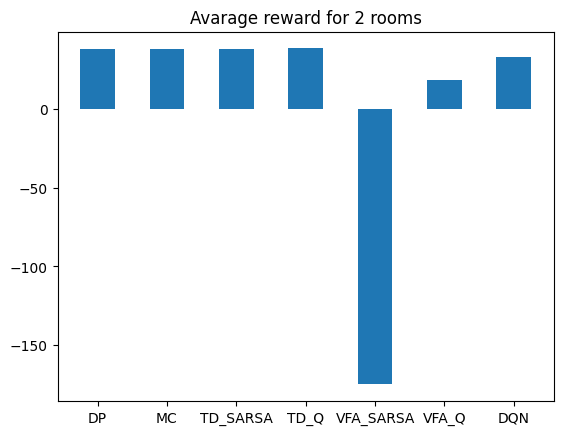

In [59]:
plt.bar(['DP','MC','TD_SARSA','TD_Q','VFA_SARSA','VFA_Q','DQN'],[avarage_return_dp, avarage_return_mc,avarage_return_sarsa, avarage_return_q, avarage_return_VFA_sarsa, avarage_return_VFA_q,avarage_return_dqn], width = 0.5)
plt.title('Avarage reward for 2 rooms')

# 3 rooms

In [60]:
 # Maximum number of eggs for each room
n_eggs_list =     [5,    2 ,   4 #, 7, 6,
                  ]
# Number of rooms
n_rooms = len(n_eggs_list)  

# Initial probabilities to find an egg for each room
initial_p_list =  [0.8,  0.3 , 0.5#, 0.9, 0.6
                  ]

# Decay probability rates for each room
decay_rate_list = [0.8,  0.9  , 0.7#, 0.6, 0.4
                  ]

GAMMA = 0.9

ALPHA = 0.1

# create the environment
transition_probabilities, states, actions, total_eggs = create_environment(n_rooms, n_eggs_list, initial_p_list, decay_rate_list)

# initialize the environment
env = EggsHuntEnv(states, actions, transition_probabilities, total_eggs)

env.reset()
print(f'Number of states: {env.num_states}')

print('Terminal states:')
for state in env.states:
    if env.is_terminal_state(state):
        print(env.get_state_name(state))

print('==================')
print('Possbile actions:')
for action in env.actions:
    print(env.get_action_name(action))

Number of states: 270
Terminal states:
('Room 1', 5, 2, 4)
('Room 2', 5, 2, 4)
('Room 3', 5, 2, 4)
Possbile actions:
search
stay
go_to_room_1
go_to_room_2
go_to_room_3


In [61]:
random_policy = create_random_policy(env)

In [62]:
num_runs = 500  # number of runs
n_episodes = 100 # number of episodes in each run

## DP

In [63]:
env.reset()

0

In [64]:
policy_dp, V, Q_dp = policy_iteration(env, gamma=GAMMA, threshold=0.001, verbose=False)
V

array([33.0978785 , 31.34233079, 30.56464937, 30.26614804, 30.26614804,
       32.68102677, 30.83196224, 29.58808505, 29.17832692, 29.17832692,
       32.40015233, 30.48840052, 29.00752475, 28.36449966, 28.36449966,
       27.1400741 , 25.14038936, 24.25448445, 23.91426181, 23.91426181,
       26.66477435, 24.55878236, 23.14209916, 22.67532329, 22.67532329,
       26.34472036, 24.16740562, 22.48081798, 21.7484581 , 21.7484581 ,
       21.99156812, 19.64441311, 18.60450925, 18.20496478, 18.20496478,
       21.43321583, 18.9614944 , 17.29882104, 16.7509057 , 16.7509057 ,
       21.05744094, 18.50208149, 16.52265124, 15.66312107, 15.66312107,
       17.77167615, 14.91488485, 13.64914478, 13.16266425, 13.16266425,
       17.09167697, 14.08346743, 12.05994358, 11.39303333, 11.39303333,
       16.63422431, 13.52428365, 11.11526204, 10.06918039, 10.06918039,
       14.6850948 , 11.05313461,  9.44392633,  8.82529514,  8.82529514,
       13.82025891,  9.99595325,  7.4234994 ,  6.57560772,  6.57

In [65]:
env.reset()

# This is for one policy
total_return = 0 
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(policy_dp[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            #print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "policy_dp"
avarage_return_dp=total_return/ num_runs

In [66]:
avarage_return_dp

64.988

## MC

In [67]:
env.reset()

0

In [69]:
optimal_policy_mc, Q_mc= MC_onpolicy(env, policy=None, eps=0.01, num_timesteps=500, num_iterations=10000)

In [70]:
env.reset()

# This is for one policy
total_return = 0 
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(optimal_policy_mc[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            #print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "optimal_policy_mc"
avarage_return_mc=total_return/ num_runs

In [71]:
avarage_return_mc

48.612

## TD

In [72]:
Q = temploral_difference_policy_evaluation(env, policy=random_policy, n_steps=10000, gamma=GAMMA, alpha=ALPHA)

### Sarsa

In [73]:
num_runs = 300
n_steps =  10000
Q_list = []
for n in range(num_runs):
    optimal_policy, Q = sarsa(env, n_steps=n_steps, gamma=GAMMA, alpha=ALPHA, begin_epsilon=1, end_epsilon=0.001, verbose=True)
    Q_list.append(Q)
Q_td_sarsa = np.array(Q_list).mean(axis=0)

Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0

In [74]:
policy_td_sarsa = compute_optimal_policy(env, Q_td_sarsa)

In [75]:
env.reset()

# This is for one policy
total_return = 0 
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(policy_td_sarsa[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            #print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "policy_td_sarsa"
avarage_return_sarsa=total_return/ num_runs

In [76]:
avarage_return_sarsa

64.46666666666667

### Q-learning

In [77]:
n_steps = 100000
policy_td_q_learning, Q = q_learning(env, n_steps=n_steps, gamma=GAMMA, alpha=ALPHA, begin_epsilon=1, end_epsilon=0.01, verbose=True)

Passed 0 steps.


In [78]:
env.reset()
# This is for one policy policy_td_q_learning
total_return = 0
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(policy_td_q_learning[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            #print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "policy_td_q_learning"
avarage_return_q=total_return/ num_runs

In [79]:
avarage_return_q

62.02

# VFA

In [80]:
feature_extractor  = FeatureExtractor(env)

In [81]:
vfa = VFA(env, feature_extractor, alpha=ALPHA, gamma=GAMMA, epsilon=1)

### Sarsa

In [82]:
Q_vfa_sarsa = vfa.semi_gradient_sarsa(n_steps=200000, begin_epsilon=1, end_epsilon=0.1)
policy_vfa_sarsa = compute_optimal_policy(env, Q_vfa_sarsa)

In [83]:
env.reset()
# This is for one policy policy_vfa_sarsa
total_return = 0
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(policy_vfa_sarsa[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            #print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "policy_vfa_sarsa"
avarage_return_VFA_sarsa=total_return/ num_runs

In [84]:
avarage_return_VFA_sarsa

-151.0

### Q-learning

In [85]:
Q_vfa_qlearning = vfa.semi_gradient_qlearning(n_steps=200000, begin_epsilon=1, end_epsilon=0.1)
policy_vfa_qlearning = compute_optimal_policy(env, Q_vfa_qlearning)

In [86]:
env.reset()
# This is for one policy policy_vfa_qlearning
total_return = 0
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(policy_vfa_qlearning[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "policy_vfa_qlearning"
avarage_return_VFA_q=total_return/ num_runs

In [87]:
avarage_return_VFA_q

50.12

## DQN

In [96]:
batch_size = 32
EPISODES = 100
num_iterations= 100

In [97]:
Q=DQN_train(env, batch_size, EPISODES, num_iterations)

Saved checkpoint for episode 50 at 'trained_agents/model_checkpoint_episode_50.pth'
Saved checkpoint for episode 100 at 'trained_agents/model_checkpoint_episode_100.pth'


In [98]:
def test_DQN(env, checkpoint_path):
    """
    Test our DQN algorithm, loading it from the checkpoint file and output cumulative return.
    
    Args:
        env: a MDP enviornment
        checkpoint_path: take the file  
    """ 
    
    # Initialize the state, the action size and the state size
    state= env.reset()
    state_size = 1
    action_size = len(env.get_possible_actions(state))
    
    # initialize the model
    loaded_model = DQN(state_size, action_size)
 
    # Load the state dictionary into the model
    loaded_model.load_state_dict(torch.load(checkpoint_path))

    loaded_model.to(device) 

    # initilize the agent 
    agent = DQNAgent(env, state_size, action_size)
    agent.model = loaded_model
    agent.target_model = loaded_model
    agent.epsilon = 0.1
    
    # initialize the variables needed
    done = False
    total_reward = 0
    
    # Loop until the episode ends ( we can't do it, it's too computational expensive, so we put a threshold)
    for _ in range(10000):# not done:

        # Reshape the state for the DQN
        state = np.reshape(state, [1, state_size])

        # Select an action following the greedy policy
        action = agent.act(state, training=False)

        # Perform the action and store the next_state the reward and if the state is terminal
        reward, next_state, done = env.step(action)

        # Move to the next state
        state = next_state

        # check if the state is terminal
        if done:
            break
        
        # update reward
        total_reward += reward
    
    return (f'Total reward: {total_reward}')

In [99]:
checkpoint_path = "trained_agents/model_checkpoint_episode_100.pth"

In [100]:
test_DQN(env, checkpoint_path)

'Total reward: 26'

In [101]:
# Initialize the state, the action size and the state size
state= env.reset()
state_size = 1
action_size = len(env.get_possible_actions(state))

# initialize the model
loaded_model = DQN(state_size, action_size)

# Load the state dictionary into the model
loaded_model.load_state_dict(torch.load(checkpoint_path))

loaded_model.to(device) 

# initilize the agent 
agent = DQNAgent(env, state_size, action_size)
agent.model = loaded_model
agent.target_model = loaded_model
agent.epsilon = 0.1

# initialize the variables needed
done = False
total_reward = 0

# Loop until the episode ends ( we can't do it, it's too computational expensive, so we put a threshold)
for n in range(num_runs):
    for ep in range(n_episodes):
        # Reshape the state for the DQN
        state = np.reshape(state, [1, state_size])

        # Select an action following the greedy policy
        action = agent.act(state, training=False)

        # Perform the action and store the next_state the reward and if the state is terminal
        reward, next_state, done = env.step(action)

        # Move to the next state
        state = next_state

        # check if the state is terminal
        if done:
            break
        
        # update reward
        total_reward += reward
        
        # Move to the next state
    env.reset()
        
        # check if the state is terminal
      

avarage_return_dqn=total_reward/ num_runs

In [102]:
avarage_return_dqn

33.26

## Bar plot

Text(0.5, 1.0, 'Avarage reward for 3 rooms')

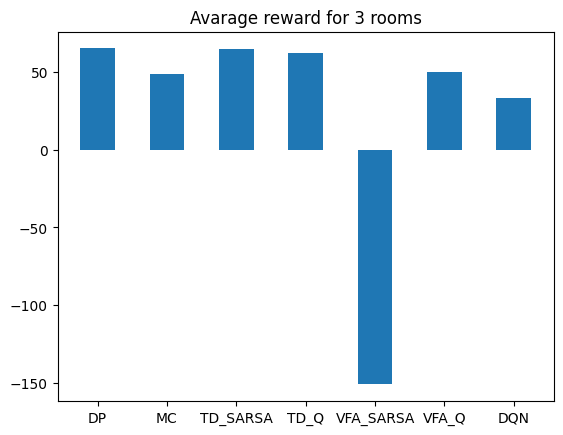

In [103]:
plt.bar(['DP','MC','TD_SARSA','TD_Q','VFA_SARSA','VFA_Q','DQN'],[avarage_return_dp, avarage_return_mc,avarage_return_sarsa, avarage_return_q, avarage_return_VFA_sarsa, avarage_return_VFA_q,avarage_return_dqn], width = 0.5)
plt.title('Avarage reward for 3 rooms')

# 4 rooms

In [104]:
 # Maximum number of eggs for each room
n_eggs_list =     [5,    2 ,   4 , 7#, 6,
                  ]
# Number of rooms
n_rooms = len(n_eggs_list)  

# Initial probabilities to find an egg for each room
initial_p_list =  [0.8,  0.3 , 0.5, 0.9#, 0.6
                  ]

# Decay probability rates for each room
decay_rate_list = [0.8,  0.9  ,0.7, 0.6 #, 0.4
                  ]

GAMMA = 0.9

ALPHA = 0.1

# create the environment
transition_probabilities, states, actions, total_eggs = create_environment(n_rooms, n_eggs_list, initial_p_list, decay_rate_list)

# initialize the environment
env = EggsHuntEnv(states, actions, transition_probabilities, total_eggs)

env.reset()
print(f'Number of states: {env.num_states}')

print('Terminal states:')
for state in env.states:
    if env.is_terminal_state(state):
        print(env.get_state_name(state))

print('==================')
print('Possbile actions:')
for action in env.actions:
    print(env.get_action_name(action))

Number of states: 2880
Terminal states:
('Room 1', 5, 2, 4, 7)
('Room 2', 5, 2, 4, 7)
('Room 3', 5, 2, 4, 7)
('Room 4', 5, 2, 4, 7)
Possbile actions:
search
stay
go_to_room_1
go_to_room_2
go_to_room_3
go_to_room_4


In [105]:
random_policy = create_random_policy(env)

In [106]:
num_runs = 500  # number of runs
n_episodes = 100 # number of episodes in each run

## DP

In [107]:
env.reset()

0

In [108]:
policy_dp, V, Q_dp = policy_iteration(env, gamma=GAMMA, threshold=0.001, verbose=False)
V

array([37.52637222, 34.42158312, 33.36682346, ...,  0.        ,
        0.        ,  0.        ])

In [109]:
env.reset()

# This is for one policy
total_return = 0 
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(policy_dp[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            #print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "policy_dp"
avarage_return_dp=total_return/ num_runs

In [110]:
avarage_return_dp

87.42

## MC

In [111]:
env.reset()

0

In [113]:
optimal_policy_mc, Q_mc= MC_onpolicy(env, policy=None, eps=0.01, num_timesteps=500, num_iterations=10000)

In [114]:
env.reset()

# This is for one policy
total_return = 0 
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(optimal_policy_mc[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            #print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "optimal_policy_mc"
avarage_return_mc=total_return/ num_runs

In [115]:
avarage_return_mc

28.136

## TD

In [116]:
Q = temploral_difference_policy_evaluation(env, policy=random_policy, n_steps=10000, gamma=GAMMA, alpha=ALPHA)

### Sarsa

In [117]:
num_runs = 300
n_steps =  10000
Q_list = []
for n in range(num_runs):
    optimal_policy, Q = sarsa(env, n_steps=n_steps, gamma=GAMMA, alpha=ALPHA, begin_epsilon=1, end_epsilon=0.001, verbose=True)
    Q_list.append(Q)
Q_td_sarsa = np.array(Q_list).mean(axis=0)

Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0

In [118]:
policy_td_sarsa = compute_optimal_policy(env, Q_td_sarsa)

In [119]:
env.reset()

# This is for one policy
total_return = 0 
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(policy_td_sarsa[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            #print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "policy_td_sarsa"
avarage_return_sarsa=total_return/ num_runs

In [120]:
avarage_return_sarsa

39.31333333333333

### Q-learning

In [121]:
n_steps = 100000
policy_td_q_learning, Q = q_learning(env, n_steps=n_steps, gamma=GAMMA, alpha=ALPHA, begin_epsilon=1, end_epsilon=0.01, verbose=True)

Passed 0 steps.


In [122]:
env.reset()
# This is for one policy policy_td_q_learning
total_return = 0
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(policy_td_q_learning[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            #print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "policy_td_q_learning"
avarage_return_q=total_return/ num_runs

In [123]:
avarage_return_q

61.46666666666667

# VFA

In [124]:
feature_extractor  = FeatureExtractor(env)

In [125]:
vfa = VFA(env, feature_extractor, alpha=ALPHA, gamma=GAMMA, epsilon=1)

### Sarsa

In [126]:
Q_vfa_sarsa = vfa.semi_gradient_sarsa(n_steps=200000, begin_epsilon=1, end_epsilon=0.1)
policy_vfa_sarsa = compute_optimal_policy(env, Q_vfa_sarsa)

In [127]:
env.reset()
# This is for one policy policy_vfa_sarsa
total_return = 0
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(policy_vfa_sarsa[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            #print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "policy_vfa_sarsa"
avarage_return_VFA_sarsa=total_return/ num_runs

In [128]:
avarage_return_VFA_sarsa

-104.16

### Q-learning

In [129]:
Q_vfa_qlearning = vfa.semi_gradient_qlearning(n_steps=20000, begin_epsilon=1, end_epsilon=0.1)
policy_vfa_qlearning = compute_optimal_policy(env, Q_vfa_qlearning)

In [130]:
env.reset()
# This is for one policy policy_vfa_qlearning
total_return = 0
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(policy_vfa_qlearning[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "policy_vfa_qlearning"
avarage_return_VFA_q=total_return/ num_runs

In [131]:
avarage_return_VFA_q

-140.0

## DQN

In [141]:
batch_size = 32
EPISODES = 100
num_iterations= 100

In [142]:
Q=DQN_train(env, batch_size, EPISODES, num_iterations)

Saved checkpoint for episode 50 at 'trained_agents/model_checkpoint_episode_50.pth'
Saved checkpoint for episode 100 at 'trained_agents/model_checkpoint_episode_100.pth'


In [143]:
def test_DQN(env, checkpoint_path):
    """
    Test our DQN algorithm, loading it from the checkpoint file and output cumulative return.
    
    Args:
        env: a MDP enviornment
        checkpoint_path: take the file  
    """ 
    
    # Initialize the state, the action size and the state size
    state= env.reset()
    state_size = 1
    action_size = len(env.get_possible_actions(state))
    
    # initialize the model
    loaded_model = DQN(state_size, action_size)
 
    # Load the state dictionary into the model
    loaded_model.load_state_dict(torch.load(checkpoint_path))

    loaded_model.to(device) 

    # initilize the agent 
    agent = DQNAgent(env, state_size, action_size)
    agent.model = loaded_model
    agent.target_model = loaded_model
    agent.epsilon = 0.1
    
    # initialize the variables needed
    done = False
    total_reward = 0
    
    # Loop until the episode ends ( we can't do it, it's too computational expensive, so we put a threshold)
    for _ in range(10000):# not done:

        # Reshape the state for the DQN
        state = np.reshape(state, [1, state_size])

        # Select an action following the greedy policy
        action = agent.act(state, training=False)

        # Perform the action and store the next_state the reward and if the state is terminal
        reward, next_state, done = env.step(action)

        # Move to the next state
        state = next_state

        # check if the state is terminal
        if done:
            break
        
        # update reward
        total_reward += reward
    
    return (f'Total reward: {total_reward}')

In [144]:
checkpoint_path = "trained_agents/model_checkpoint_episode_100.pth"

In [145]:
test_DQN(env, checkpoint_path)

'Total reward: 8'

In [146]:
# Initialize the state, the action size and the state size
state= env.reset()
state_size = 1
action_size = len(env.get_possible_actions(state))

# initialize the model
loaded_model = DQN(state_size, action_size)

# Load the state dictionary into the model
loaded_model.load_state_dict(torch.load(checkpoint_path))

loaded_model.to(device) 

# initilize the agent 
agent = DQNAgent(env, state_size, action_size)
agent.model = loaded_model
agent.target_model = loaded_model
agent.epsilon = 0.1

# initialize the variables needed
done = False
total_reward = 0

# Loop until the episode ends ( we can't do it, it's too computational expensive, so we put a threshold)
for n in range(num_runs):
    for ep in range(n_episodes):
        # Reshape the state for the DQN
        state = np.reshape(state, [1, state_size])

        # Select an action following the greedy policy
        action = agent.act(state, training=False)

        # Perform the action and store the next_state the reward and if the state is terminal
        reward, next_state, done = env.step(action)

        # Move to the next state
        state = next_state

        # check if the state is terminal
        if done:
            break
        
        # update reward
        total_reward += reward
        
        # Move to the next state
    env.reset()
        
        # check if the state is terminal
      

avarage_return_dqn=total_reward/ num_runs

In [147]:
avarage_return_dqn

9.5

## Bar plot

Text(0.5, 1.0, 'Avarage reward for 4 rooms')

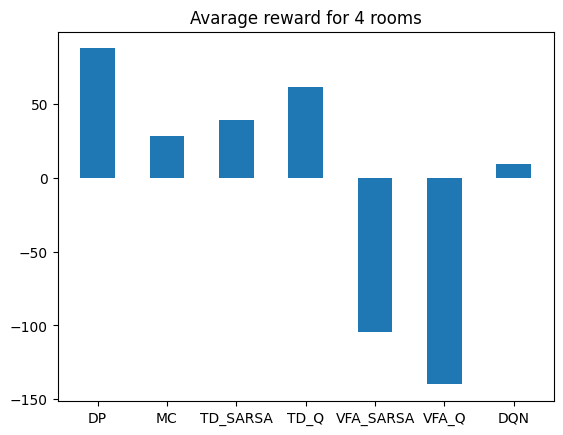

In [148]:
plt.bar(['DP','MC','TD_SARSA','TD_Q','VFA_SARSA','VFA_Q','DQN'],[avarage_return_dp, avarage_return_mc,avarage_return_sarsa, avarage_return_q, avarage_return_VFA_sarsa, avarage_return_VFA_q,avarage_return_dqn], width = 0.5)
plt.title('Avarage reward for 4 rooms')

# 5 rooms

In [150]:
 # Maximum number of eggs for each room
n_eggs_list =     [5,    2 ,   4 , 7, 6,
                  ]
# Number of rooms
n_rooms = len(n_eggs_list)  

# Initial probabilities to find an egg for each room
initial_p_list =  [0.8,  0.3 , 0.5, 0.9, 0.6
                  ]

# Decay probability rates for each room
decay_rate_list = [0.8,  0.9  , 0.7, 0.6, 0.4
                  ]

GAMMA = 0.9

ALPHA = 0.1

# create the environment
transition_probabilities, states, actions, total_eggs = create_environment(n_rooms, n_eggs_list, initial_p_list, decay_rate_list)

# initialize the environment
env = EggsHuntEnv(states, actions, transition_probabilities, total_eggs)

env.reset()
print(f'Number of states: {env.num_states}')

print('Terminal states:')
for state in env.states:
    if env.is_terminal_state(state):
        print(env.get_state_name(state))

print('==================')
print('Possbile actions:')
for action in env.actions:
    print(env.get_action_name(action))

Number of states: 25200
Terminal states:
('Room 1', 5, 2, 4, 7, 6)
('Room 2', 5, 2, 4, 7, 6)
('Room 3', 5, 2, 4, 7, 6)
('Room 4', 5, 2, 4, 7, 6)
('Room 5', 5, 2, 4, 7, 6)
Possbile actions:
search
stay
go_to_room_1
go_to_room_2
go_to_room_3
go_to_room_4
go_to_room_5


In [151]:
random_policy = create_random_policy(env)

In [152]:
num_runs = 500  # number of runs
n_episodes = 100 # number of episodes in each run

## DP

In [153]:
env.reset()

0

In [154]:
policy_dp, V, Q_dp = policy_iteration(env, gamma=GAMMA, threshold=0.001, verbose=False)
V

array([38.28514517, 37.56935241, 37.52766352, ...,  0.        ,
        0.        ,  0.        ])

In [155]:
env.reset()

# This is for one policy
total_return = 0 
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(policy_dp[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            #print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "policy_dp"
avarage_return_dp=total_return/ num_runs

In [156]:
avarage_return_dp

98.16

## MC

In [157]:
env.reset()

0

In [158]:
optimal_policy_mc, Q_mc= MC_onpolicy(env, policy=None, eps=0.01, num_timesteps=500, num_iterations=10000)

In [159]:
env.reset()

# This is for one policy
total_return = 0 
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(optimal_policy_mc[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            #print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "optimal_policy_mc"
avarage_return_mc=total_return/ num_runs

In [160]:
avarage_return_mc

29.324

## TD

In [161]:
Q = temploral_difference_policy_evaluation(env, policy=random_policy, n_steps=10000, gamma=GAMMA, alpha=ALPHA)

### Sarsa

In [162]:
num_runs = 300
n_steps =  100000
Q_list = []
for n in range(num_runs):
    optimal_policy, Q = sarsa(env, n_steps=n_steps, gamma=GAMMA, alpha=ALPHA, begin_epsilon=1, end_epsilon=0.001, verbose=True)
    Q_list.append(Q)
Q_td_sarsa = np.array(Q_list).mean(axis=0)

Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0 steps.
Passed 0

In [163]:
policy_td_sarsa = compute_optimal_policy(env, Q_td_sarsa)

In [164]:
env.reset()

# This is for one policy
total_return = 0 
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(policy_td_sarsa[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            #print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "policy_td_sarsa"
avarage_return_sarsa=total_return/ num_runs

In [165]:
avarage_return_sarsa

39.49333333333333

### Q-learning

In [166]:
n_steps = 100000
policy_td_q_learning, Q = q_learning(env, n_steps=n_steps, gamma=GAMMA, alpha=ALPHA, begin_epsilon=1, end_epsilon=0.01, verbose=True)

Passed 0 steps.


In [167]:
env.reset()
# This is for one policy policy_td_q_learning
total_return = 0
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(policy_td_q_learning[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            #print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "policy_td_q_learning"
avarage_return_q=total_return/ num_runs

In [168]:
avarage_return_q

33.60666666666667

# VFA

In [169]:
feature_extractor  = FeatureExtractor(env)

In [170]:
vfa = VFA(env, feature_extractor, alpha=ALPHA, gamma=GAMMA, epsilon=1)

### Sarsa

In [171]:
Q_vfa_sarsa = vfa.semi_gradient_sarsa(n_steps=200000, begin_epsilon=1, end_epsilon=0.1)
policy_vfa_sarsa = compute_optimal_policy(env, Q_vfa_sarsa)

In [172]:
env.reset()
# This is for one policy policy_vfa_sarsa
total_return = 0
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(policy_vfa_sarsa[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            #print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "policy_vfa_sarsa"
avarage_return_VFA_sarsa=total_return/ num_runs

In [173]:
avarage_return_VFA_sarsa

-140.0

### Q-learning

In [174]:
Q_vfa_qlearning = vfa.semi_gradient_qlearning(n_steps=20000, begin_epsilon=1, end_epsilon=0.1)
policy_vfa_qlearning = compute_optimal_policy(env, Q_vfa_qlearning)

In [175]:
env.reset()
# This is for one policy policy_vfa_qlearning
total_return = 0
for n in range(num_runs):
    for ep in range(n_episodes):
        action = np.argmax(policy_vfa_qlearning[env.current_state])
        reward, next_state, done = env.step(action)
        if done:
            print(f'Completed in {ep} episodes')
            break
        total_return += reward  # return for one run, but they can be different so we need to average them over many independent runs
    env.reset()
        
# average return of the policy "policy_vfa_qlearning"
avarage_return_VFA_q=total_return/ num_runs

In [176]:
avarage_return_VFA_q

-140.0

## DQN

In [177]:
batch_size = 32
EPISODES = 100
num_iterations= 100

In [178]:
Q=DQN_train(env, batch_size, EPISODES, num_iterations)

Saved checkpoint for episode 50 at 'trained_agents/model_checkpoint_episode_50.pth'
Saved checkpoint for episode 100 at 'trained_agents/model_checkpoint_episode_100.pth'


In [179]:
def test_DQN(env, checkpoint_path):
    """
    Test our DQN algorithm, loading it from the checkpoint file and output cumulative return.
    
    Args:
        env: a MDP enviornment
        checkpoint_path: take the file  
    """ 
    
    # Initialize the state, the action size and the state size
    state= env.reset()
    state_size = 1
    action_size = len(env.get_possible_actions(state))
    
    # initialize the model
    loaded_model = DQN(state_size, action_size)
 
    # Load the state dictionary into the model
    loaded_model.load_state_dict(torch.load(checkpoint_path))

    loaded_model.to(device) 

    # initilize the agent 
    agent = DQNAgent(env, state_size, action_size)
    agent.model = loaded_model
    agent.target_model = loaded_model
    agent.epsilon = 0.1
    
    # initialize the variables needed
    done = False
    total_reward = 0
    
    # Loop until the episode ends ( we can't do it, it's too computational expensive, so we put a threshold)
    for _ in range(10000):# not done:

        # Reshape the state for the DQN
        state = np.reshape(state, [1, state_size])

        # Select an action following the greedy policy
        action = agent.act(state, training=False)

        # Perform the action and store the next_state the reward and if the state is terminal
        reward, next_state, done = env.step(action)

        # Move to the next state
        state = next_state

        # check if the state is terminal
        if done:
            break
        
        # update reward
        total_reward += reward
    
    return (f'Total reward: {total_reward}')

In [180]:
checkpoint_path = "trained_agents/model_checkpoint_episode_100.pth"

In [184]:
test_DQN(env, checkpoint_path)

'Total reward: 0'

In [185]:
# Initialize the state, the action size and the state size
state= env.reset()
state_size = 1
action_size = len(env.get_possible_actions(state))

# initialize the model
loaded_model = DQN(state_size, action_size)

# Load the state dictionary into the model
loaded_model.load_state_dict(torch.load(checkpoint_path))

loaded_model.to(device) 

# initilize the agent 
agent = DQNAgent(env, state_size, action_size)
agent.model = loaded_model
agent.target_model = loaded_model
agent.epsilon = 0.1

# initialize the variables needed
done = False
total_reward = 0

# Loop until the episode ends ( we can't do it, it's too computational expensive, so we put a threshold)
for n in range(num_runs):
    for ep in range(n_episodes):
        # Reshape the state for the DQN
        state = np.reshape(state, [1, state_size])

        # Select an action following the greedy policy
        action = agent.act(state, training=False)

        # Perform the action and store the next_state the reward and if the state is terminal
        reward, next_state, done = env.step(action)

        # Move to the next state
        state = next_state

        # check if the state is terminal
        if done:
            break
        
        # update reward
        total_reward += reward
        
        # Move to the next state
    env.reset()
        
        # check if the state is terminal
      

avarage_return_dqn=total_reward/ num_runs

In [186]:
avarage_return_dqn

0.0

## Bar plot

Text(0.5, 1.0, 'Avarage reward for 5 rooms')

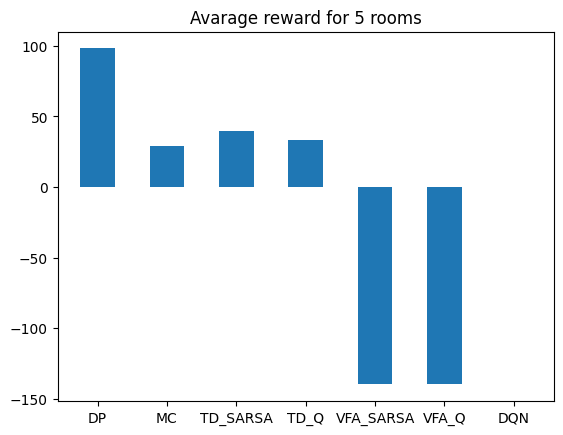

In [187]:
plt.bar(['DP','MC','TD_SARSA','TD_Q','VFA_SARSA','VFA_Q','DQN'],[avarage_return_dp, avarage_return_mc,avarage_return_sarsa, avarage_return_q, avarage_return_VFA_sarsa, avarage_return_VFA_q,avarage_return_dqn], width = 0.5)
plt.title('Avarage reward for 5 rooms')